<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_3a_OSI_SAF_sea_ice_mapping_Ice_Concentration.ipynb" target="_blank"><< Mapping OSI SAF sea ice concentration</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3c_OSI_SAF_sea_ice_mapping_Ice_Type.ipynb" target="_blank">Mapping OSI SAF sea ice type >></a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-osi-saf-sea-ice/HEAD?urlpath=%2Ftree%2F1_OSI_SAF_sea_ice_introductory%2F1_3b_OSI_SAF_sea_ice_mapping_ice_edge.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF sea ice parameters : Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1_OSI_SAF_sea_ice_FTP_data_access.ipynb" target="_blank">1_1_OSI_SAF_sea_ice_FTP_data_access.ipynb</a>**

</div>
<hr>

# 1.3b Mapping OSI SAF sea ice edge 
### Data used 

| Product Description | Product Navigator | OSI SAF website link | OSI SAF Identifier |
|:--------------------:|:-------------:|:-----------------:|:-----------------:|
| Global Sea Ice Edge | EO:EUM:DAT:MULT:OSIEDGBN | <a href="https://osi-saf.eumetsat.int/products/osi-402-d" target="_blank">link</a> | OSI-402-d | 


### Learning outcomes

At the end of this notebook you will know;
* How to open Sea Ice Edge netcdf
* Map Sea Ice Edge using cartopy 

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Mapping sea ice edge - Northern Hemisphere](#section1)
 1. [Mapping sea ice edge - Southern Hemisphere](#section2)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports 
import os                               # a library that allows us access to basic operating system commands
import xarray as xr                     # a library that supports the use of multi-dimensional arrays in Python
import matplotlib as mpl                # a library for visualization
import matplotlib.patches as mpatches   # a part of the plotting library
import matplotlib.pyplot as plt         # a library that supports plotting
import matplotlib.cm as mpl_cm          # a part of the plotting library that provides colour maps
import cartopy.crs as ccrs              # a mapping library that supports reprojection
import cartopy.feature as cfeature      # a part of the mapping library that provides features such as coastlines
import cmocean                          # colormaps for ocean products
import cmcrameri                        # scientific colormaps for data visualisation
import numpy as np                      # a library that supports array manipulation
import warnings                         # a library that controls python warnings
warnings.filterwarnings('ignore')

##
<div class="alert alert-warning" role="alert">

## <a id='section0'></a>0. Supporting functions
[Back to top](#TOC-TOP)

</div>

Before we begin, we will define shorts functions.

The function name `mapping_ice_edge` create a plot figure of sea ice concentration product available in the directory **dir** with a specific output projection and a specific region of the globe if given.

In [2]:
def mapping_edge(directory, data_projection, output_projection, cmap, ax=None, title="", ice_shelves=None, region=None):
    """
    Function to map Sea Ice Edge. 

     Args:
        directory (string)  : the directory where files are
        data_projection     : the input projection of data
        output_projection   : the output projection to plot map
        cmap                : color palette
        ax                  : axes of the plot
        ice_shelves         : ice shelves for southern hemisphere
        region (list)       : the region to zoom in. If not region is given, plot a global map
        title (string)      : title of the plot
    Returns:
        im                  : the plotting figure

    """

    # define plot carateristics
    if not ax: ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
    if region: ax.set_extent(region, crs=data_projection)
    ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black') # Change color of ocean
    ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey')  # Change color of land
    ax.gridlines(draw_labels=True)   # Add grid line with latitude and logitude label 
    #ax.coastlines()    # Add coastline
    if ice_shelves: ax.add_feature(ice_shelves, )

    # Add title
    plt.title(title, fontsize=18)


    # open and plot data
    for filename in os.listdir(directory):
        if filename.endswith(".nc"):
            nc = xr.open_dataset(os.path.join(directory, filename))
            xc = nc.variables['xc'][:] 
            yc = nc.variables['yc'][:]
            ice_edge = nc.variables['ice_edge'][:]
            status_flag  = nc.variables['status_flag'][:]
            nc.close()
            
            # Sea Ice Concentration data is provided in x y coordinates, bounds need to be defined for cartopy
            bounds=(xc.min()*1000,xc.max()*1000,yc.min()*1000,yc.max()*1000)
            
            # plotting sea ice
            im = ax.imshow(ice_edge[0,:,:], transform=data_projection, extent=bounds, origin='upper', cmap=cmap)
    
    return im

The function name `add_legend` create a legend of the image im.

In [3]:
def add_legend(im):
    """
    Function to add legend for Sea Ice Edge. 

     Args:
        im          : image
    """
    labels = ['no ice or very open ice', 'open ice cover (4 to 7 tens)', 'close, very close and fast ice']
    colors = [ im.cmap(im.norm(value)) for value in [1,2,3]]
    # create a patch (proxy artist) for every color 
    patches = [ mpatches.Patch(color=colors[i], label=labels[i] ) for i in range(3) ]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches, bbox_to_anchor=(0.46, 0.12), loc=2, borderaxespad=0.1 , fontsize=10)
    

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Mapping sea ice edge - Northern Hemisphere
[Back to top](#TOC-TOP)

</div>

Setting directory where to read data files

In [4]:
directory = os.path.join(os.getcwd(), 'products', 'sea_ice_edge', 'nh')

Choose a colormap for your data set. You can find more information on matplotlib colormaps <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">here</a>.   
However, we recommend you have a look at <a href=" https://matplotlib.org/cmocean/" target="_blank">cmocean colormaps</a> or that you use scientific colormaps for data visulaisation from librairies such as cmcrameri.

In [5]:
#cmap = mpl_cm.get_cmap('jet')
#cmap = cmocean.cm.ice
cmap = cmcrameri.cm.nuuk

Let's explore the netcdf file to find out about its characteristics.

In [6]:
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(os.path.join(directory, filename))

In [7]:
nc

<xarray.Dataset> Size: 31MB
Dimensions:                   (time: 1, nv: 2, xc: 760, yc: 1120)
Coordinates:
  * time                      (time) datetime64[ns] 8B 2024-03-03T12:00:00
  * xc                        (xc) float64 6kB -3.84e+03 -3.83e+03 ... 3.74e+03
  * yc                        (yc) float64 9kB 5.84e+03 5.83e+03 ... -5.34e+03
    lat                       (yc, xc) float32 3MB ...
    lon                       (yc, xc) float32 3MB ...
Dimensions without coordinates: nv
Data variables:
    Polar_Stereographic_Grid  int32 4B ...
    time_bnds                 (time, nv) datetime64[ns] 16B ...
    ice_edge                  (time, yc, xc) float32 3MB ...
    status_flag               (time, yc, xc) float32 3MB ...
    uncertainty               (time, yc, xc) float32 3MB ...
    param_used                (time, yc, xc) float32 3MB ...
    orbit_num_ascat           (time, yc, xc) float32 3MB ...
    orbit_num_amsr            (time, yc, xc) float32 3MB ...
    orbit_num_ssmis           (time, yc, xc) float32 3MB ...
Attributes: (12/30)
    title:                  Daily Sea Ice Edge Analysis from OSI SAF EUMETSAT
    product_id:             OSI-402-d
    product_name:           osi_saf_ice_edge
    product_status:         operational
    abstract:               The daily analysis of sea ice edges and extent is...
    topiccategory:          Oceans ClimatologyMeteorologyAtmosphere
    ...                     ...
    references:             OSI SAF Product User's Manual for the Global Sea ...
    history:                2024-03-04 creation
    product_version:        5.0
    software_version:       5.3
    netcdf_version:         4.4.1.1
    Conventions:            CF-1.7

If we explore the ice_edge variable, we find out the ice_dege is represented with 3 values :   
* 1 -> no ice or very open ice
* 2 -> open ice cover (4 to 7 tens)
* 3 -> close, very close and fast ice

Mapping figure based on retrieved netcdf file

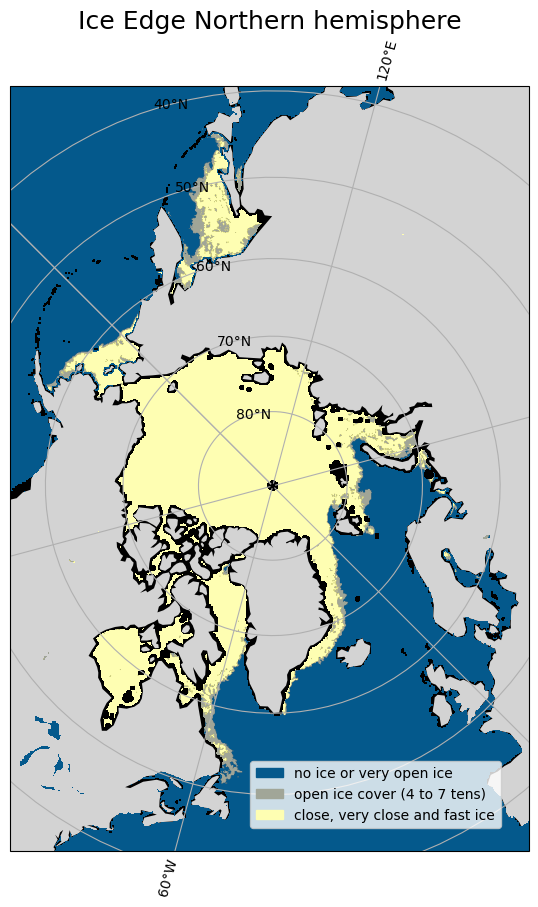

In [8]:
# Create a new figure
fig = plt.figure(figsize=(9,9))

# Map Sea Ice concentration
data_projection=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, true_scale_latitude=70.0)
output_projection=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, true_scale_latitude=70.0)
im = mapping_edge(directory, 
                  data_projection, 
                  output_projection, 
                  cmap=cmap, 
                  title="Ice Edge Northern hemisphere")

# Add a colorbar for sea ice concentration
add_legend(im)

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Mapping sea ice edge - Southern Hemisphere
[Back to top](#TOC-TOP)

</div>

Setting directory where to read data files

In [9]:
directory = os.path.join(os.getcwd(), 'products', 'sea_ice_edge', 'sh')

Choose a colormap for your data set. You can find more information on matplotlib colormaps <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">here</a>.   
However, we recommend you have a look at <a href=" https://matplotlib.org/cmocean/" target="_blank">cmocean colormaps</a> or that you use scientific colormaps for data visulaisation from librairies such as cmcrameri.

In [10]:
#cmap = mpl_cm.get_cmap('jet')
#cmap = cmocean.cm.ice
cmap = cmcrameri.cm.nuuk

Let's explore the netcdf file to find out about its characteristics.

In [11]:
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(os.path.join(directory, filename))

In [12]:
nc

<xarray.Dataset> Size: 24MB
Dimensions:                   (time: 1, nv: 2, xc: 790, yc: 830)
Coordinates:
  * time                      (time) datetime64[ns] 8B 2024-03-03T12:00:00
  * xc                        (xc) float64 6kB -3.94e+03 -3.93e+03 ... 3.94e+03
  * yc                        (yc) float64 7kB 4.34e+03 4.33e+03 ... -3.94e+03
    lat                       (yc, xc) float32 3MB ...
    lon                       (yc, xc) float32 3MB ...
Dimensions without coordinates: nv
Data variables:
    Polar_Stereographic_Grid  int32 4B ...
    time_bnds                 (time, nv) datetime64[ns] 16B ...
    ice_edge                  (time, yc, xc) float32 3MB ...
    status_flag               (time, yc, xc) float32 3MB ...
    uncertainty               (time, yc, xc) float32 3MB ...
    param_used                (time, yc, xc) float32 3MB ...
    orbit_num_ascat           (time, yc, xc) float32 3MB ...
    orbit_num_amsr            (time, yc, xc) float32 3MB ...
    orbit_num_ssmis           (time, yc, xc) float32 3MB ...
Attributes: (12/30)
    title:                  Daily Sea Ice Edge Analysis from OSI SAF EUMETSAT
    product_id:             OSI-402-d
    product_name:           osi_saf_ice_edge
    product_status:         operational
    abstract:               The daily analysis of sea ice edges and extent is...
    topiccategory:          Oceans ClimatologyMeteorologyAtmosphere
    ...                     ...
    references:             OSI SAF Product User's Manual for the Global Sea ...
    history:                2024-03-04 creation
    product_version:        5.0
    software_version:       5.3
    netcdf_version:         4.4.1.1
    Conventions:            CF-1.7

If we explore the ice_edge variable, we find out the ice_dege is represented with 3 values :   
* 1 -> no ice or very open ice
* 2 -> open ice cover (4 to 7 tens)
* 3 -> close, very close and fast ice

Mapping figure based on retrieved netcdf file

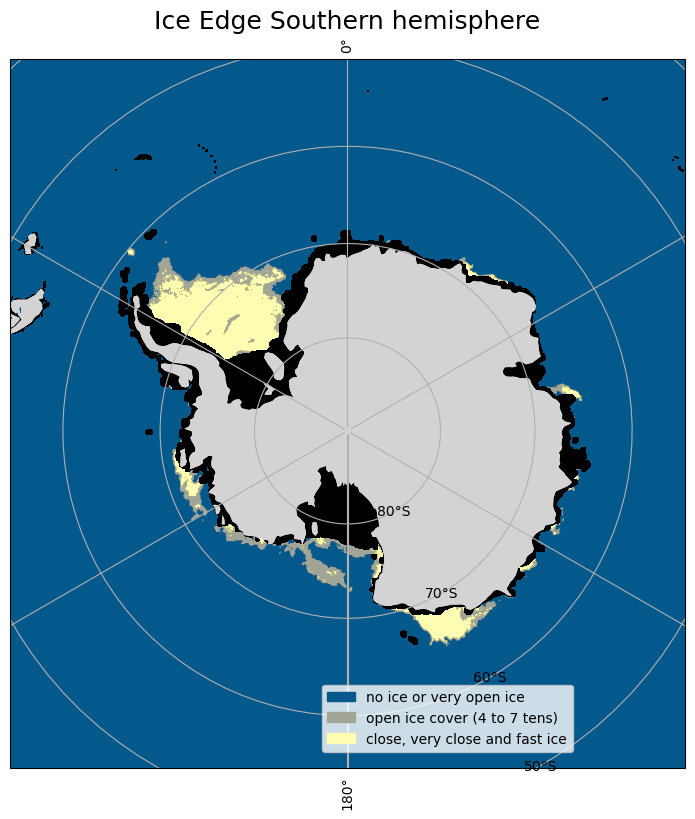

In [13]:
# Create a new figure
fig = plt.figure(figsize=(9,9))

# Map Sea Ice concentration
data_projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0, true_scale_latitude=-70.0)
output_projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0, true_scale_latitude=-70.0)
im = mapping_edge(directory,  
                  data_projection,
                  output_projection, 
                  cmap=cmap, 
                  title="Ice Edge Southern hemisphere")

# Add a colorbar for sea ice concentration
add_legend(im)

You should notice on the figure above, that there are missing areas of data around the Antarctic continent. These correspond to Ice Shelves that are not included directly in cartopy LAND boundaries. So let's add them to the plot.

In [14]:
ice_shelves = cfeature.NaturalEarthFeature(
        category='physical',
        name='antarctic_ice_shelves_polys',
        scale='10m',
        facecolor='lightgrey',
        edgecolor='lightgrey')

Plot with Ice Shelves.

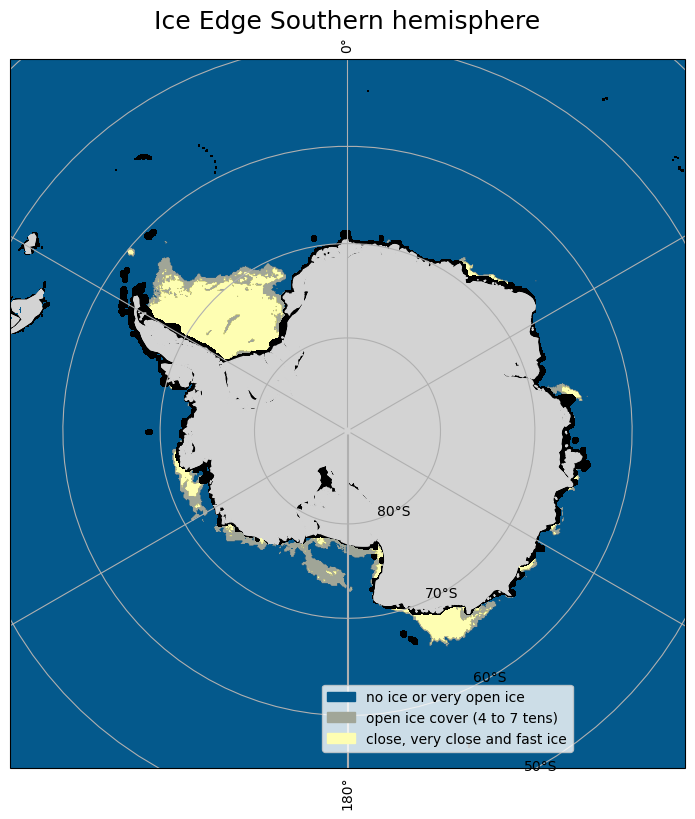

In [15]:
# Create a new figure
fig = plt.figure(figsize=(9,9))

# Map Sea Ice concentration
data_projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0, true_scale_latitude=-70.0)
output_projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0, true_scale_latitude=-70.0)
im = mapping_edge(directory,  
                  data_projection,
                  output_projection, 
                  cmap=cmap, 
                  ice_shelves=ice_shelves,
                  title="Ice Edge Southern hemisphere")

# Add a colorbar for sea ice concentration
add_legend(im)

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_3a_OSI_SAF_sea_ice_mapping_Ice_Concentration.ipynb" target="_blank"><< Mapping OSI SAF sea ice concentration</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3c_OSI_SAF_sea_ice_mapping_Ice_Type.ipynb" target="_blank">Mapping OSI SAF sea ice type >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>